In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Use seaborn style defaults and set the default figure size
sns.set(font_scale=1.5, rc={'figure.figsize':(20, 4)})

In [2]:
df = pd.read_csv('AllTraffic_1.csv', sep='\t')
#df.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (18,20,21,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
ports_extra_df = pd.read_csv('ports.csv', sep=',')
ports_df = ports_extra_df[['port', 'description']].set_index('port')
ports_df.index = ports_df.index.astype(str)

#clean data
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.index = df['timestamp']
df['actual_protocol'] = df['destination_port'].map(ports_df.to_dict()['description'])

In [4]:
def scan_attack_grouper(ips, timeframe):
    dataframe = df.loc[df['source_ip'].isin(ips)]
    if timeframe:
        start_date, end_date = timeframe
        mask = (dataframe['timestamp'] > start_date) & (dataframe['timestamp'] <= end_date)
        dataframe = dataframe.loc[mask]

    scan_attack_ip_grouped = dataframe.groupby(
        'source_ip'
    ).resample('30T')['id'].nunique().to_frame(name='attacks')
    scan_attack_ip_grouped = scan_attack_ip_grouped.loc[(scan_attack_ip_grouped!=0).any(axis=1)].unstack('source_ip')
    return scan_attack_ip_grouped, dataframe

### Group 1
#### the 85.93.20.0/24 subnet

In [5]:
group1_df = df[df['subnet'] == '85.93.20.0/24']

In [6]:
len(df[df['subnet'] == '85.93.20.0/24']['source_ip'].unique())

42

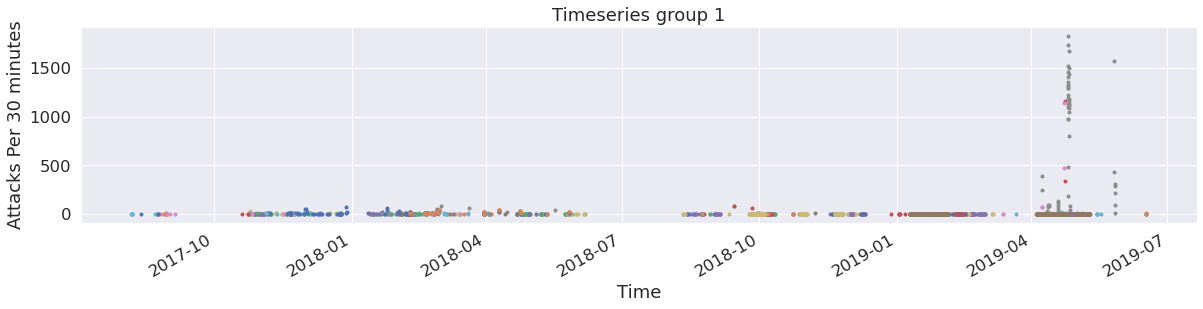

In [7]:
ips = group1_df['source_ip'].unique()

start_date = pd.to_datetime('2019-04-22')
end_date = pd.to_datetime('2019-04-26')
timeframe = None #[start_date, end_date]
scan_attack_ip_group_4, scan_attack_ip_df_4 = scan_attack_grouper(ips, timeframe)

fg = scan_attack_ip_group_4.plot(marker='.', linestyle='None', legend=None)
for p in fg.patches:
    fg.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=45)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel('Time')
plt.ylabel('Attacks Per 30 minutes')
plt.title('Timeseries group 1')
plt.show()

Looks as though these ips have scanned a large number of ports.

In [8]:
group1_ports = group1_df['destination_port'].unique()
group1_ports = group1_ports.astype('int32')
group1_ports.min(), group1_ports.max(), len(group1_ports)

(1, 65352, 6609)

3306 is mySQL's default port

In [9]:
pd.set_option('display.max_rows', None)
group1_df.groupby('destination_port')['id'].nunique().sort_values(ascending=False)

destination_port
3306     4694
3306      599
3308       59
3309       54
22         49
3389       36
3391       23
22         22
3463       21
3919       21
3762       21
3531       21
4333       20
3398       18
3604       18
3423       18
3389       17
13389      16
5810       16
3379       15
3983       15
3450       15
3399       13
3303       13
50505      13
3524       12
3436       12
3825       12
3678       12
27272      12
11282      12
3474       12
3535       12
3354       12
3636       12
48458      12
41285      12
3530       12
5763       12
3470       12
1144       12
3206       12
43403      12
63030      12
3650       12
5432       12
3635       12
31215      12
31203      12
31200      12
53145      12
31145      12
31125      12
3822       12
3166       12
31076      12
11482      12
8318       12
31060      12
31116      12
48381      11
49561      11
41240      11
40078      11
42822      11
42130      11
47218      11
11764      11
47303      11
42680      11
601

This is the ip above that sent a huge number of packets on the 22 of april 2019

In [10]:
df[df['source_ip'] == '85.93.20.6'].groupby('destination_port')['id'].nunique().sort_values(ascending=False)

destination_port
53145    12
43403    12
48458    12
41285    12
49112    11
42895    11
47258    11
43264    11
57935    11
49826    11
57265    11
47278    11
46903    11
45133    11
42680    11
51036    11
43544    11
47709    11
47303    11
44681    11
58884    11
43287    11
45608    11
45543    11
47013    11
41436    11
61252    11
61236    11
46084    11
61021    11
60949    11
49217    11
40598    11
49929    11
60465    11
47218    11
44507    11
60187    11
48381    11
47316    11
49752    11
41131    11
46673    11
47575    11
46783    11
54912    11
45006    11
52453    11
40431    11
45797    11
47547    11
47661    11
42822    11
43150    11
47441    11
47442    11
49608    11
48846    11
47472    11
40074    11
52206    11
47369    11
41725    11
42846    11
51657    11
47638    11
47632    11
55819    11
40078    11
55773    11
55757    11
44774    11
49561    11
44064    11
40563    11
52110    11
44059    11
42316    11
47936    11
46898    11
40916    11
46130    11

In [11]:
attacker = df[df['source_ip'] == '85.93.20.6']
start_date = pd.to_datetime('2019-04-22')
end_date = pd.to_datetime('2019-04-26')
mask = (attacker['timestamp'] > start_date) & (attacker['timestamp'] <= end_date)
attacker_ports = attacker.loc[mask]['destination_port'].unique()
attacker_ports = attacker_ports.astype('int32')
attacker_ports.sort()
attacker_ports

array([40002, 40003, 40004, ..., 49994, 49995, 49998], dtype=int32)

### Group 2
#### the 164.52.0.0/24 subnet

['164.52.0.135' '164.52.0.130' '164.52.0.132' '164.52.0.133'
 '164.52.0.136' '164.52.0.137' '164.52.0.139' '164.52.0.138'
 '164.52.0.134' '164.52.0.131' '164.52.0.140' '164.52.0.142'
 '164.52.0.141']


Text(0.5, 1.0, 'Timeseries group 1')

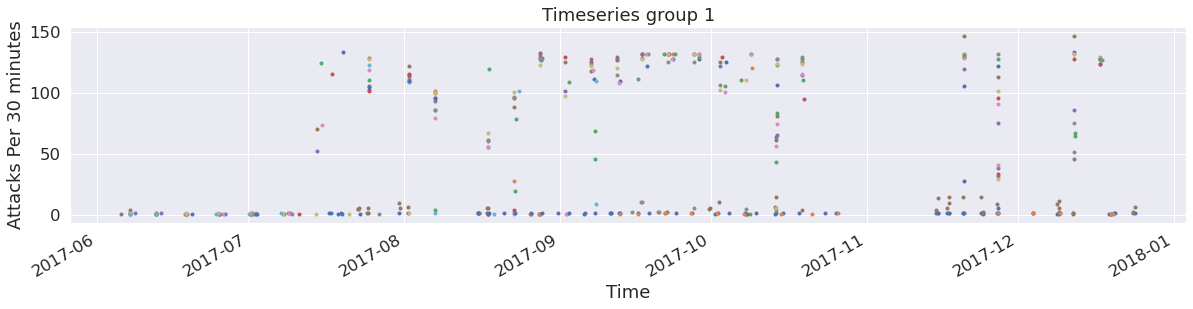

In [12]:
group2_df = df[df['subnet'] == '164.52.0.0/24']
ips = group2_df['source_ip'].unique()
print(ips)

start_date = pd.to_datetime('2019-04-22')
end_date = pd.to_datetime('2019-04-26')
timeframe = None #[start_date, end_date]
scan_attack_ip_group_4, scan_attack_ip_df_4 = scan_attack_grouper(ips, timeframe)

fg = scan_attack_ip_group_4.plot(marker='.', linestyle='None', legend=None)
for p in fg.patches:
    fg.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=45)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel('Time')
plt.ylabel('Attacks Per 30 minutes')
plt.title('Timeseries group 1')
# plt.show()

In [13]:
group2_df.groupby('destination_port')['id'].count().sort_values(ascending=False)

destination_port
1521     1270
10000     989
7777      912
143       902
83        893
1962      866
20547     828
10001     807
13        606
8081      500
554       478
666       466
179       443
2404      379
10243     360
15        360
1200      247
5000      243
49        230
2455      225
513       222
9987      216
646       189
444       182
1201      181
5432      158
143       137
995       136
8088      135
15        135
82        134
873       133
8443      133
110       133
1111      133
119       132
1090      132
8888      132
992       132
524       132
11        132
2375      132
2376      132
123       132
2494      132
7         132
990       132
5007      132
502       132
1099      131
88        130
8090      130
902       130
8089      130
5001      129
85        128
84        128
465       128
2121      128
553       128
830       127
37777     126
5900      126
389       125
1025      125
4848      124
8000      123
90        123
37        122
6379      121
993

### Group 3


Text(0.5, 1.0, 'Timeseries group 1')

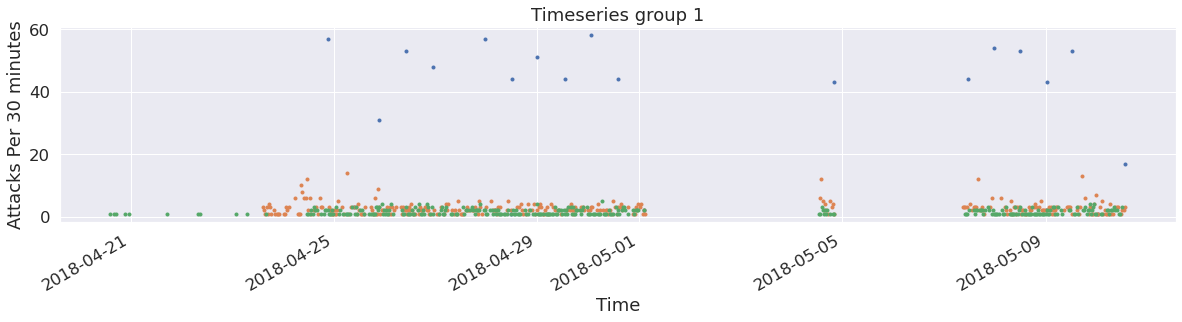

In [14]:
ips = ['124.172.138.143', '134.184.53.153', '181.214.87.34']
group3_df = df[df['source_ip'].isin(ips)]

start_date = pd.to_datetime('2018-04-20')
end_date = pd.to_datetime('2018-05-15')
timeframe = [start_date, end_date]
scan_attack_ip_group_4, scan_attack_ip_df_4 = scan_attack_grouper(ips, timeframe)

fg = scan_attack_ip_group_4.plot(marker='.', linestyle='None', legend=None)
for p in fg.patches:
    fg.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=45)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel('Time')
plt.ylabel('Attacks Per 30 minutes')
plt.title('Timeseries group 1')
# plt.show()

In [15]:
group3_df['destination_ip'].unique()

array(['192.168.10.2', '192.168.10.6', '192.168.10.5', '192.168.10.4',
       '192.168.10.3'], dtype=object)

In [16]:
group3_ports = group3_df['destination_port'].unique()
group3_ports = group3_ports.astype('int32')
group3_ports.sort()
print(group3_ports.min(), group3_ports.max(), len(group3_ports))
group3_ports

1142 60009 544


array([ 1142,  1143,  1144,  1146,  1147,  1148,  1150,  1153,  1158,
        1199,  1200,  1201,  1202,  1203,  1204,  1205,  1206,  1207,
        1209,  1210,  1211,  1212,  1213,  1214,  1215,  1216,  1217,
        1218,  1239,  1240,  1241,  1242,  1243,  1244,  1245,  1247,
        1248,  1249,  1250,  1251,  1252,  1253,  1254,  1255,  1256,
        1257,  1258,  1260,  1261,  1262,  1263,  1265,  1266,  1267,
        1268,  1269,  1270,  1271,  1272,  1273,  1274,  1275,  1277,
        1278,  1325,  2062,  2065,  2069,  2076,  2141,  2144,  2145,
        2147,  2148,  2151,  2152,  2154,  2156,  2157,  2199,  2200,
        2202,  2203,  2204,  2205,  2206,  2207,  2208,  2210,  2211,
        2213,  2214,  2215,  2217,  2218,  2259,  2260,  2261,  2262,
        2263,  2264,  2265,  2266,  2267,  2268,  2269,  2270,  2271,
        2272,  2273,  2274,  2275,  2276,  2277,  2327,  2700,  3139,
        3141,  3142,  3144,  3149,  3150,  3151,  3153,  3154,  3155,
        3156,  3306,

### Group 4

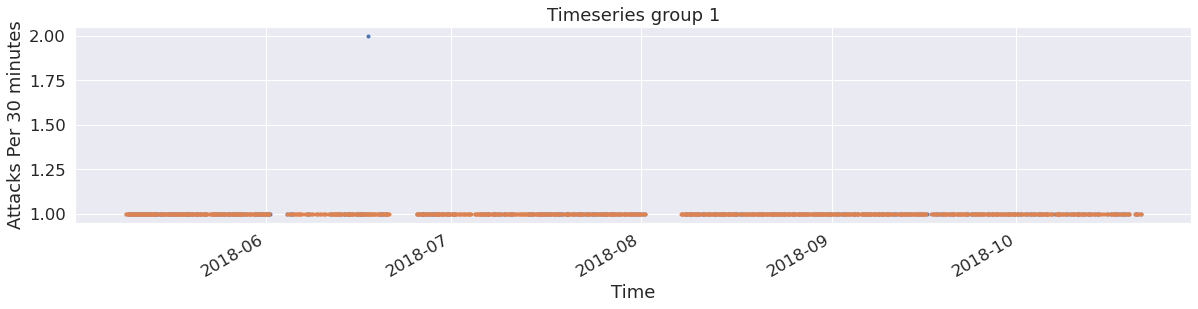

In [17]:
ips = ['193.201.224.206', '195.3.147.49']
group4_df = df[df['source_ip'].isin(ips)]

start_date = pd.to_datetime('2018-04-20')
end_date = pd.to_datetime('2018-05-15')
timeframe = None #[start_date, end_date]
scan_attack_ip_group_4, scan_attack_ip_df_4 = scan_attack_grouper(ips, timeframe)

fg = scan_attack_ip_group_4.plot(marker='.', linestyle='None', legend=None)
for p in fg.patches:
    fg.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=45)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel('Time')
plt.ylabel('Attacks Per 30 minutes')
plt.title('Timeseries group 1')
plt.show()

In [18]:
group4_df['destination_ip'].unique()

array(['192.168.10.2'], dtype=object)

In [19]:
group4_ports = group4_df['destination_port'].unique()
group4_ports = group4_ports.astype('int32')
group4_ports.sort()
print(group4_ports.min(), group4_ports.max(), len(group4_ports))
group4_ports

22 22 2


array([22, 22], dtype=int32)

### Group 5

Text(0.5, 1.0, 'Timeseries group 1')

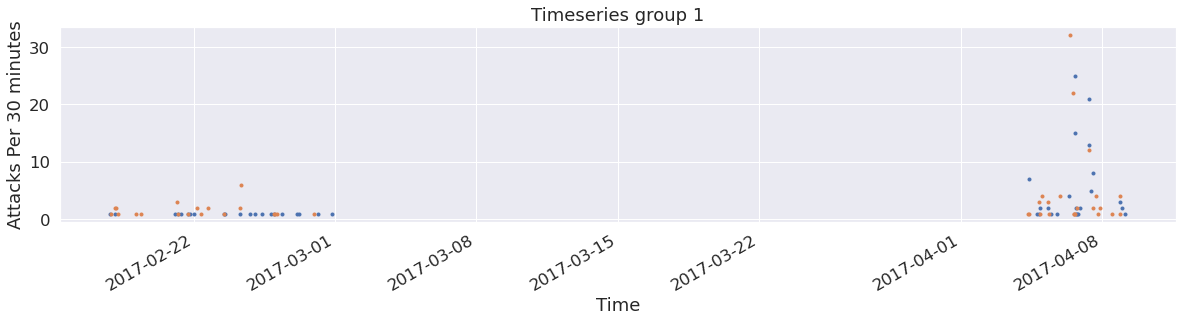

In [20]:
ips = ['121.18.238.109', '221.194.44.231']
group5_df = df[df['source_ip'].isin(ips)]

start_date = pd.to_datetime('2017-02-15')
end_date = pd.to_datetime('2017-05-01')
timeframe = [start_date, end_date]
scan_attack_ip_group_4, scan_attack_ip_df_4 = scan_attack_grouper(ips, timeframe)

fg = scan_attack_ip_group_4.plot(marker='.', linestyle='None', legend=None)
for p in fg.patches:
    fg.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=45)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel('Time')
plt.ylabel('Attacks Per 30 minutes')
plt.title('Timeseries group 1')
# plt.show()

In [21]:
group5_ports = group5_df['destination_port'].unique()
group5_ports = group5_ports.astype('int32')
group5_ports.sort()
print(group5_ports.min(), group5_ports.max(), len(group5_ports))
group5_ports

22 22 2


array([22, 22], dtype=int32)

In [22]:
len(group5_df)

279

In [23]:
group5_df['destination_ip'].unique()

array(['192.168.10.4', '192.168.10.5', '192.168.10.3', '192.168.10.6',
       '192.168.10.2'], dtype=object)

In [24]:
group5_df.groupby('destination_ip').agg({
    'id': lambda i: i.nunique(),
    'source_ip': lambda ip: list(ip.unique()),
})

id                         source_ip
destination_ip                                       
192.168.10.2     17  [121.18.238.109, 221.194.44.231]
192.168.10.3     30  [121.18.238.109, 221.194.44.231]
192.168.10.4     47  [121.18.238.109, 221.194.44.231]
192.168.10.5    176  [121.18.238.109, 221.194.44.231]
192.168.10.6      9  [221.194.44.231, 121.18.238.109]

In [25]:
cowrie_df = pd.read_csv('cowrie_1.csv', sep='\t')
cowrie_df['timestamp'] = pd.to_datetime(cowrie_df['timestamp'])

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
cowrie_df[cowrie_df['source_ip'].isin(ips)]['credentials'].unique()

array(["[['root', 'passwrod'], ['root', '123456'], ['root', 'toor']]",
       "[['root', 'root'], ['root', 'insecure'], ['root', 'centos']]",
       "[['root', 'admin'], ['root', 'centos6svm'], ['root', 'root123']]",
       "[['root', 'tickets'], ['root', 's@rum@n'], ['root', 'splender']]",
       "[['root', 'shadowman'], ['root', 'saraswati'], ['root', 'salim']]",
       "[['root', 'sailing1'], ['root', 'rudolf'], ['root', 'rootuser']]",
       '[]',
       "[['root', 'indian123'], ['root', 'impulse'], ['root', 'iloveyouso']]",
       "[['root', 'bunny'], ['root', 'bgt56yhn'], ['root', 'angela1']]",
       "[['root', 'biotech'], ['root', 'because'], ['root', 'battery']]",
       "[['root', 'bartmart23'], ['root', 'artur1'], ['root', 'apples1']]",
       "[['root', 'anisha'], ['root', 'anhmaiyeuem'], ['root', 'andrei']]",
       "[['root', 'aliali'], ['root', 'a4tech'], ['root', '786110']]",
       "[['root', '741741'], ['root', '686868'], ['root', '656565']]",
       "[['root', '1bart

In [27]:
cowrie_df[cowrie_df['source_ip'].isin(ips)]['loggedin'].unique()

array(['None'], dtype=object)